# House Prices ML Project: Feature Engineering & Optimization

## Виконав: Шавало Андрій


##  Мета
Оптимізувати модель регресії для прогнозування цін на нерухомість за допомогою Feature Engineering.


In [69]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

##  Завантаження та попередній огляд даних

In [70]:

df = pd.read_csv('./train.csv')
print(df.shape)
df.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Базовий EDA

In [71]:

print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


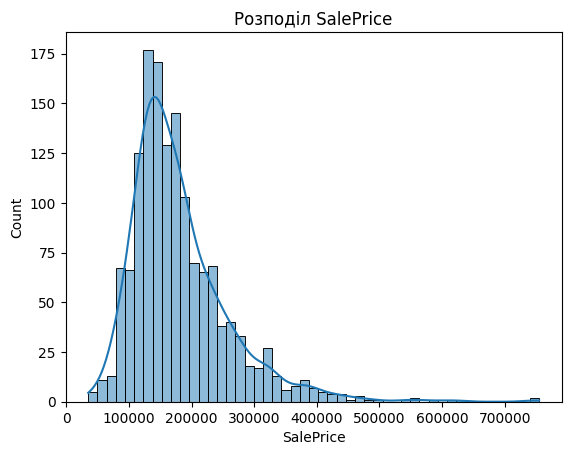

In [ ]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Розподіл SalePrice')
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
correlation.head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

##  Побудова базової моделі

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

data = df.copy()

num_cols = data.select_dtypes(include=['number']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

label_encoders = {}
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0]) 
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

baseline_preds = baseline_model.predict(X_valid)
baseline_rmse = np.sqrt(mean_squared_error(y_valid, baseline_preds))
print(f'RMSE базової моделі: {baseline_rmse:.2f}')


RMSE базової моделі: 28455.23


##  Feature Engineering

In [ ]:

fe_data = df.copy()
fe_data['TotalSF'] = fe_data['TotalBsmtSF'] + fe_data['1stFlrSF'] + fe_data['2ndFlrSF']
fe_data['HouseAge'] = fe_data['YrSold'] - fe_data['YearBuilt']
fe_data['TotalBathrooms'] = (fe_data['FullBath'] + 0.5 * fe_data['HalfBath'] + 
                              fe_data['BsmtFullBath'] + 0.5 * fe_data['BsmtHalfBath'])
fe_data['TotalPorchSF'] = (fe_data['OpenPorchSF'] + fe_data['EnclosedPorch'] + 
                           fe_data['3SsnPorch'] + fe_data['ScreenPorch'])
fe_data['QualSF'] = fe_data['OverallQual'] * fe_data['TotalSF']
fe_data['PricePerSF'] = fe_data['SalePrice'] / fe_data['TotalSF']


fe_data.fillna(fe_data.select_dtypes(include=[np.number]).median(), inplace=True)

for col in fe_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    fe_data[col] = le.fit_transform(fe_data[col].astype(str))

X_fe = fe_data.drop(['Id', 'SalePrice'], axis=1)
y_fe = fe_data['SalePrice']
X_train_fe, X_valid_fe, y_train_fe, y_valid_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)


##  Модель з новими ознаками

In [76]:

model_fe = RandomForestRegressor(random_state=42)
model_fe.fit(X_train_fe, y_train_fe)
preds_fe = model_fe.predict(X_valid_fe)


rmse_fe = np.sqrt(mean_squared_error(y_valid_fe, preds_fe))
print(f'RMSE з новими ознаками: {rmse_fe:.2f}')



RMSE з новими ознаками: 13756.60


##  Важливість ознак

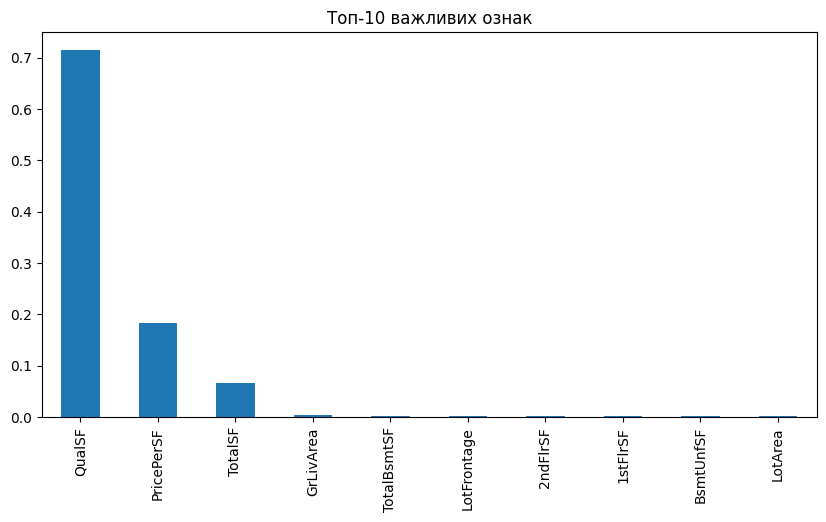

In [77]:
importances = model_fe.feature_importances_
features = X_train_fe.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.head(10).plot(kind='bar', figsize=(10, 5), title='Топ-10 важливих ознак')
plt.show()


##  Візуалізація новостворених ознак

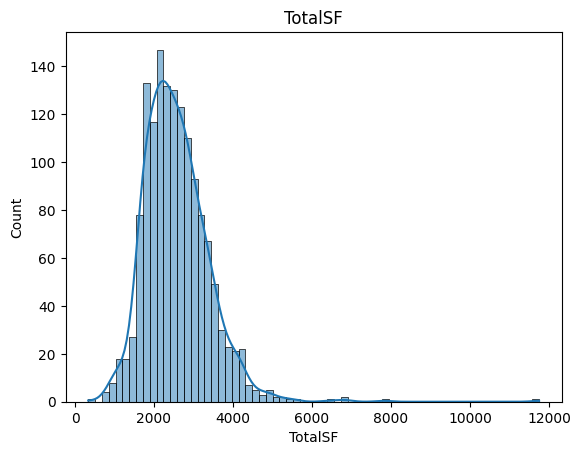

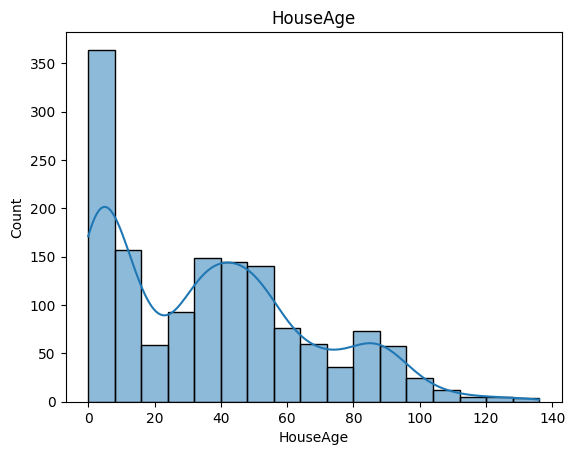

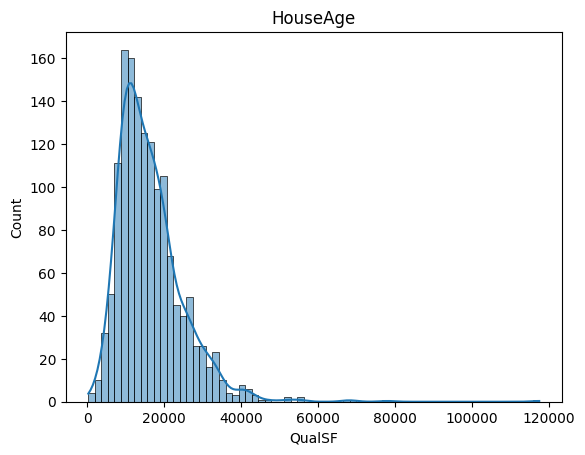

In [80]:

sns.histplot(fe_data['TotalSF'], kde=True)
plt.title('TotalSF')
plt.show()

sns.histplot(fe_data['HouseAge'], kde=True)
plt.title('HouseAge')
plt.show()

sns.histplot(fe_data['QualSF'], kde=True)
plt.title('HouseAge')
plt.show()
